In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dataset=pd.read_csv('loan-train.csv')
#Let's explore the "dataset"
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
dataset.shape

(614, 13)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
dataset.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

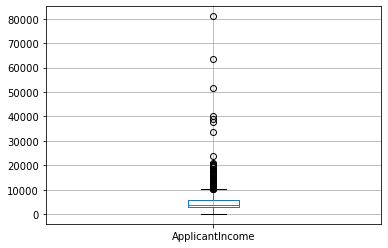

In [6]:
dataset.boxplot(column=['ApplicantIncome'])

<AxesSubplot:>

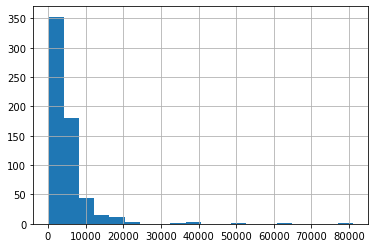

In [7]:
dataset['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

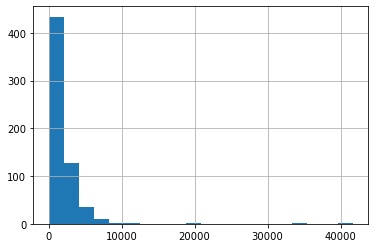

In [8]:
dataset['CoapplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

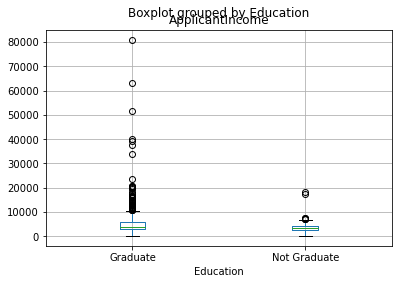

In [9]:
#lETS CHECK ON THE BASIS GRADUATION QUALIFICATION

dataset.boxplot(column='ApplicantIncome',by='Education')#Here, you can see the graduate income is higher than un graduate.

<AxesSubplot:>

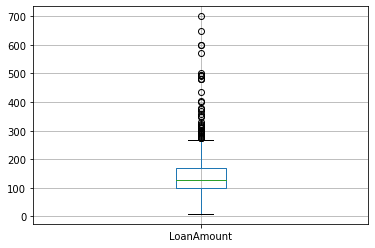

In [10]:
dataset.boxplot(column=['LoanAmount'])

<AxesSubplot:>

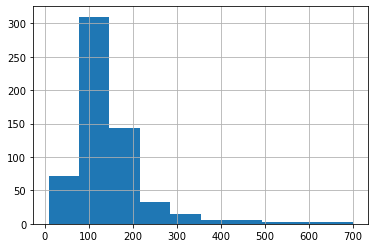

In [11]:
dataset['LoanAmount'].hist(bins=10) #little bit right skewed

# Let's Normalize and Scaling for implementation and further implementation.

<AxesSubplot:>

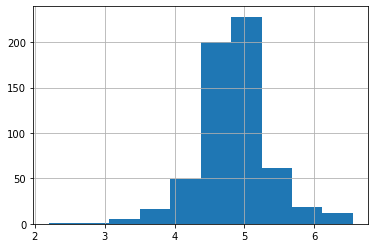

In [12]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=10)#lets check after normalization

In [13]:
#Let's check missing values here.
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [14]:
# Let's fill the missing values right here,
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)

#It's a numerical so mean will be the rulers

dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)
dataset['LoanAmount_log'].fillna(dataset['LoanAmount_log'].mean(),inplace=True)

#Loan amount has some of categorical value so we will be using Mode() over here
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

#So in this either 0 or 1 so agin it's an categorical vale so, we will be using mode() over here
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [15]:
# Let's check missing values handled or not
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

# So we have already seen that Applicant income and Co-Applicant income was right skewed so let's normalize now,

In [16]:
#Firstly, let's combine Applicant and co applicant income

dataset['TotalIncome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])

<AxesSubplot:>

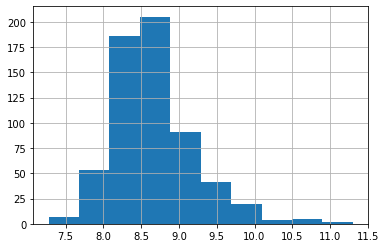

In [17]:
dataset['TotalIncome_log'].hist(bins=10) #Completely normalize now

In [18]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [19]:
dataset.drop(columns=['Loan_ID','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area','LoanAmount','LoanAmount_log','TotalIncome'],inplace=True)

In [20]:
dataset.head(2)

,Gender,Married,Loan_Status,TotalIncome_log
0,Male,No,Y,8.674026
1,Male,Yes,N,8.714568


# Now we have normalized and handled the missing values and now let's divide our data set into an independent and dependent variables

In [21]:
x=dataset[['Gender','Married','TotalIncome_log']]
y=dataset.iloc[:,-2].values

In [22]:
x

,Gender,Married,TotalIncome_log
0,Male,No,8.674026
1,Male,Yes,8.714568
2,Male,Yes,8.006368
3,Male,Yes,8.505323
4,Male,No,8.699515
...,...,...,...
609,Female,No,7.972466
610,Male,Yes,8.320205
611,Male,Yes,9.025456
612,Male,Yes,8.933664


In [23]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)#Random state to be zero becoz i doesn't want our data change 

In [25]:
x_train #Here you have categorical values at a certain point so we have to convert them into simple numerical like yes or no=1 or 0

,Gender,Married,TotalIncome_log
90,Male,Yes,8.675564
533,Male,No,9.328123
452,Male,Yes,8.644883
355,Female,No,8.246172
266,Male,Yes,8.715224
...,...,...,...
277,Male,Yes,8.390041
9,Male,Yes,10.077819
359,Male,Yes,9.028099
192,Male,Yes,8.705000


In [26]:
#For That we will be using LABEL ENCODER()

from sklearn.preprocessing import LabelEncoder

labelencoder_x=LabelEncoder()

In [27]:
x_train['Married']=labelencoder_x.fit_transform(x_train['Married'])

<ipython-input-27-e5db43931892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Married']=labelencoder_x.fit_transform(x_train['Married'])


In [28]:
x_train['Gender']=labelencoder_x.fit_transform(x_train['Gender'])

<ipython-input-28-e5ad00d108d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Gender']=labelencoder_x.fit_transform(x_train['Gender'])


In [29]:
x_train

,Gender,Married,TotalIncome_log
90,1,1,8.675564
533,1,0,9.328123
452,1,1,8.644883
355,0,0,8.246172
266,1,1,8.715224
...,...,...,...
277,1,1,8.390041
9,1,1,10.077819
359,1,1,9.028099
192,1,1,8.705000


In [30]:
y_train

array(['Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N

In [31]:
#Let's create another instance on a y_train


labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

In [32]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [33]:
#Same with X_test
x_test['Married']=labelencoder_x.fit_transform(x_test['Married'])
x_test['Gender']=labelencoder_x.fit_transform(x_test['Gender'])

<ipython-input-33-7284020cc933>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Married']=labelencoder_x.fit_transform(x_test['Married'])
<ipython-input-33-7284020cc933>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Gender']=labelencoder_x.fit_transform(x_test['Gender'])


In [34]:
x_test

,Gender,Married,TotalIncome_log
454,1,0,8.865735
52,0,0,8.349957
536,1,1,9.214233
469,1,1,8.822322
55,1,1,8.262301
...,...,...,...
337,1,1,8.867850
376,1,1,9.528503
278,1,1,9.587612
466,1,1,8.436200


In [35]:
# And for y test as well 
y_test=labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

# Let's quickly scale our data

In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

# Now, it's time to apply algorithm
# 1):Decision Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
y_pred=dtc.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
print("The accuracy of decision tree is: ",accuracy_score(y_pred,y_test))

The accuracy of decision tree is:  0.5447154471544715


In [40]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
y_pred=reg_rf.predict(x_test)

In [42]:
reg_rf.score(x_train,y_train)

0.7874000397643758

In [43]:
testdata=pd.read_csv("loan-test.csv")

In this testdataset our status is not present becoz we want from our model predict whether a person is eligible or not that we have made before!!!

We will be using NaiveBayes to perdict this

In [44]:
testdata.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<AxesSubplot:>

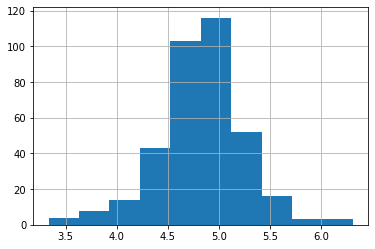

In [45]:
testdata['LoanAmount_log']=np.log(testdata['LoanAmount'])
testdata['LoanAmount_log'].hist(bins=10)#lets check after normalization

In [46]:
# Let's fill the missing values right here,
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)

testdata['Married'].fillna(testdata['Married'].mode()[0],inplace=True)

testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)

testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)

#It's a numerical so mean will be the rulers

testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean(),inplace=True)
testdata['LoanAmount_log'].fillna(testdata['LoanAmount_log'].mean(),inplace=True)

#Loan amount has some of categorical value so we will be using Mode() over here
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)

#So in this either 0 or 1 so agin it's an categorical vale so, we will be using mode() over here
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)

In [47]:
#Firstly, let's combine Applicant and co applicant income

testdata['TotalIncome']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_log']=np.log(testdata['TotalIncome'])

In [48]:
testdata.drop(columns=['Loan_ID','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area','LoanAmount','LoanAmount_log','TotalIncome'],inplace=True)

In [49]:
testdata.head(2)

,Gender,Married,TotalIncome_log
0,Male,Yes,8.651724
1,Male,Yes,8.428581


In [50]:
testdata['Gender']=labelencoder_x.fit_transform(testdata['Gender'])
testdata['Married']=labelencoder_x.fit_transform(testdata['Married'])

In [51]:
testdata.head(5)

,Gender,Married,TotalIncome_log
0,1,1,8.651724
1,1,1,8.428581
2,1,1,8.824678
3,1,1,8.494129
4,1,0,8.094378


# Scale our data

In [52]:
test=ss.fit_transform(testdata)
test

array([[ 0.48547939,  0.75835829,  0.07253853],
       [ 0.48547939,  0.75835829, -0.39717115],
       [ 0.48547939,  0.75835829,  0.43660049],
       ...,
       [ 0.48547939, -1.31863792, -0.11075132],
       [ 0.48547939,  0.75835829,  0.61259882],
       [ 0.48547939, -1.31863792,  1.07289157]])

In [53]:
testdata

,Gender,Married,TotalIncome_log
0,1,1,8.651724
1,1,1,8.428581
2,1,1,8.824678
3,1,1,8.494129
4,1,0,8.094378
...,...,...,...
362,1,1,8.663196
363,1,1,8.490233
364,1,0,8.564649
365,1,1,8.908289


In [54]:
y_pred=dtc.predict(x_test)

In [55]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [57]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("dtc.pkl","wb")
pickle.dump(dtc, pickle_out)
pickle_out.close()

In [70]:
import numpy as np
dtc.predict([[1,1,8.428581]])

array([0])